<a href="https://colab.research.google.com/github/DB11051998/RecommendMe/blob/master/Recommnendatio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation Test 
#### submitted by:- Debasish Beheraa


What is Recommnedation Engine?

> A recommendation engine is a system that suggests products, services, information to users based on analysis of data. Notwithstanding, the recommendation can derive from a variety of factors such as the history of the user and the behaviour of similar users


Two main techniques of developing a recommendation engine:-

> Content Based and Collaberative Based 



Content-based filtering
> Content-based filtering is based on a single   user’s interactions and preference. Recommendations are based on the metadata collected from a user’s history and interactions. 

Collaberative-based filtering
>Collaborative filtering is another commonly used technique. Collaborative filtering casts a much wider net, collecting information from the interactions from many other users to derive suggestions for you. This approach makes recommendations based on other users with similar tastes or situations.

https://miro.medium.com/max/1400/1*JLw0nVz6_buRLEY6vHioKw.jpeg)







## Import Libraries

In [0]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Read the datasets

In [0]:
userdata=pd.read_csv('/content/drive/My Drive/Recommendations engine task/Document from Debasish (Unzipped Files)/users.csv')
viewsdata=pd.read_csv('/content/drive/My Drive/Recommendations engine task/Document from Debasish (Unzipped Files)/views.csv')
postdata=pd.read_csv('/content/drive/My Drive/Recommendations engine task/Document from Debasish (Unzipped Files)/posts.csv')

In [0]:
# view the datasets

In [0]:
userdata.head()

,_id,name,gender,academics
0,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate
1,5d610ae1653a331687083239,Gaurav Sharma,male,graduate
2,5d618359fc5fcf3bdd9a0910,Akshay Mishra,male,undergraduate
3,5d6d2bb87fa40e1417a49315,Saksham Mathur,male,undergraduate
4,5d7c994d5720533e15c3b1e9,Varun Chowhan,male,undergraduate


In [0]:
postdata.head()

,_id,title,category,post_type
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog


In [0]:
viewsdata.head()

,user_id,post_id,timestamp
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z


In [0]:
## shape of the datasets

In [0]:
print(userdata.shape)
print(postdata.shape)
print(viewsdata.shape)

(118, 4)
(493, 4)
(1449, 3)


In [0]:
postdata[' post_type'].unique()

array(['blog', 'artwork', 'project', 'skill'], dtype=object)

In [0]:
##visualisation of post_type(count)

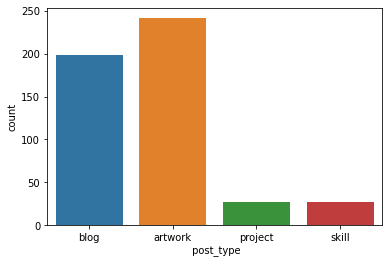

In [0]:
sns.countplot(postdata[' post_type'])

In [0]:
userdata.columns

Index(['_id', 'name', 'gender', 'academics'], dtype='object')

In [0]:
viewsdata.columns

Index(['user_id', 'post_id', 'timestamp'], dtype='object')

In [0]:
postdata.columns

Index(['_id', 'title', 'category', ' post_type'], dtype='object')

In [0]:
## Rename the columns

In [0]:
postdata.rename(columns={'_id':'post_id'},inplace=True)

In [0]:
postdata.head()

,post_id,title,category,post_type
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog


In [0]:
userdata.rename(columns={'_id':'user_id'},inplace=True)

In [0]:
userdata.head()

,user_id,name,gender,academics
0,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate
1,5d610ae1653a331687083239,Gaurav Sharma,male,graduate
2,5d618359fc5fcf3bdd9a0910,Akshay Mishra,male,undergraduate
3,5d6d2bb87fa40e1417a49315,Saksham Mathur,male,undergraduate
4,5d7c994d5720533e15c3b1e9,Varun Chowhan,male,undergraduate


In [0]:
df_new=pd.merge(viewsdata, userdata,on='user_id')

In [0]:
## merge the dataframe

In [0]:
X=pd.merge(df_new,postdata,on='post_id')

In [0]:
X[X['name']=='thesocialcomment']

,user_id,post_id,timestamp,name,gender,academics,title,category,post_type
3,5de50d768eab6401affbb135,5ec821ddec493f4a2655889e,2020-05-22T20:10:41.100Z,thesocialcomment,male,graduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
18,5de50d768eab6401affbb135,5ecd5d417023451e662235c5,2020-05-26T20:09:50.934Z,thesocialcomment,male,graduate,"Machine Learning”&“Operations"" (MlOps)",Computer Technology|Machine Learning,blog
82,5de50d768eab6401affbb135,5ec8204cec493f4a26558893,2020-05-22T20:10:45.520Z,thesocialcomment,male,graduate,Art Expo 2020,Artistic design|Logo Design|Graphic|Illustration,artwork
151,5de50d768eab6401affbb135,5ec1fd0974f7660d73aa0fd5,2020-05-18T08:38:14.735Z,thesocialcomment,male,graduate,Daaku,Drawings,artwork
269,5de50d768eab6401affbb135,5ed13d2876027d35905cc4c2,2020-05-29T18:51:36.449Z,thesocialcomment,male,graduate,Launching an EC2 instance.,Technology,skill
370,5de50d768eab6401affbb135,5ecce8a5eaff6b0c3a58a5e9,2020-05-26T20:20:17.151Z,thesocialcomment,male,graduate,The Waves Have Stood Still,Photography,artwork
384,5de50d768eab6401affbb135,5ecc1d4eeaff6b0c3a58a565,2020-05-25T19:47:45.192Z,thesocialcomment,male,graduate,Faith in yourself,Photography,artwork
412,5de50d768eab6401affbb135,5ec7a699ec493f4a2655883a,2020-05-22T20:11:09.561Z,thesocialcomment,male,graduate,HUMAN ILLUSTRATION (With Galaxy Background),Fashion Design|Illustration|Watercolours|Drawings,artwork
424,5de50d768eab6401affbb135,5ec7a8bdec493f4a26558846,2020-05-22T20:11:02.810Z,thesocialcomment,male,graduate,HUMAN ILLUSTRATION,Drawings|Fashion Design|Illustration|Watercolours,artwork
435,5de50d768eab6401affbb135,5ec7ad1aec493f4a26558869,2020-05-22T20:10:51.932Z,thesocialcomment,male,graduate,FASHION ILLUSTRATION (street fashion),Fashion Design|Illustration|Conceptual|Waterco...,artwork


In [0]:
##convert timestamp
def timestamp(df):
  y=dateutil.parser.parse(df)
  year=y.year
  month=y.month
  day=y.day
  hour=y.hour
  minute=y.minute
  return year,month,day,hour,minute

In [0]:
convt_time=X['timestamp'].apply(timestamp)

In [0]:
X['category'].value_counts()

Photography                                                                           241
Drawings                                                                              149
Painting                                                                               75
Computer Technology|Machine Learning                                                   40
Computer Technology|Cloud Computing                                                    27
                                                                                     ... 
Physiology|Gastroenterology|Cardiology                                                  1
Visual Arts|Calligraphy|Pen and ink                                                     1
Drawings|Painting|Visual Arts|Graphic Design|Prints|Illustration                        1
Literature|Movements in Literature                                                      1
Human Resources|Performance In Organization|Organizational Behaviour|HR Management      1
Name: cate

In [0]:
# preprocess fuction for preparing the dataset for the feature extraction using countvectorizer 

In [0]:
words=[]
def preprocess(df):
  word=re.sub('[|;/]',' ',df)
  word=word.lower()
  words.append(word)
    

In [0]:
# filling the nan values

In [0]:
postdata['category'].fillna('Photography',inplace=True)

#### Content Based Filtering

In [0]:
from sklearn.feature_extraction import text
import re

In [0]:
postdata['category'].apply(preprocess)

0      None
1      None
2      None
3      None
4      None
       ... 
488    None
489    None
490    None
491    None
492    None
Name: category, Length: 493, dtype: object

In [0]:
words

['plant biotechnology',
 'artificial intelligence machine learning information technology',
 'operating systems',
 'drawings',
 'competition laws',
 'competition laws',
 'competition laws',
 'competition laws',
 'eco system',
 'economic policies',
 'graphic graphic design',
 'drawings',
 'drawings',
 'painting',
 'pen and ink',
 'drawings',
 'computer technology information technology',
 'drawings painting',
 'competition laws',
 'graphic design visual arts illustration graphic',
 'drawings calligraphy',
 'photography',
 'empowerment',
 'photography',
 'photography',
 'photography',
 'drawings',
 'video editing',
 'inorganic chemistry',
 'photography',
 'drawings',
 'programming languages',
 'conceptual graphic design',
 'hr management',
 'drawings',
 'human resources hr management',
 'mass media international relations',
 'sculptures artistic design',
 'fashion design ceramics artistic design',
 'craft artistic design',
 'fashion design visual arts conceptual artistic design',
 'photo

In [0]:
userdata.user_id.isin(X.user_id).unique()

array([ True])

In [0]:
postdata.post_id.isin(X.post_id).unique()

array([ True])

In [0]:
## Countvectorizer to create the features 

In [0]:
count=text.CountVectorizer(lowercase=True)

In [0]:
value=count.fit_transform(words)

In [0]:
words=pd.DataFrame(value.toarray(),columns=np.array(count.get_feature_names()),index=postdata['title'].values)

In [0]:
#def vectorize():
#  count=text.CountVectorizer(lowercase=True)
#  value=count.fit_transform(words)
#  words=pd.DataFrame(value.toarray(),columns=np.array(count.get_feature_names()),index=dataframe['title'].values)

#  coss_matrix=cosine_similarity(words)

#  recommend_matrix=pd.DataFrame(coss_matrix)


In [0]:
words.shape

(493, 272)

In [0]:
words.head()

,2d,abuse,accounting,acrylics,activity,advertising,agreement,algebra,algorithms,alternate,analysis,and,animal,application,applications,applied,archeology,architecture,art,articulation,artificial,artistic,arts,atomic,audit,auditing,banking,basics,behaviour,bio,biology,biotechnology,break,business,calligraphy,capitalist,cardiology,carving,ceramics,chemistry,...,sociology,sports,start,statuary,stories,strategies,studies,substance,system,systems,tapestry,tax,taxation,team,tech,techniques,technology,test,textile,theory,thought,tradition,transactions,treaties,trends,typography,ups,venture,video,videography,visual,watercolours,web,wood,work,zoology,artwork,blog,project,skill
hello there,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Ml and AI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
What is an Operating System ?,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Lord Shiva,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
How Competition law evolved?,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
#cosine similarity to find the similarity between the post

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

In [0]:
type_df=pd.DataFrame(pd.get_dummies(postdata[' post_type']).to_numpy(),columns=pd.get_dummies(postdata[' post_type']).columns,index=postdata['title'].values)

In [0]:
type_df.head()

,artwork,blog,project,skill
hello there,0,1,0,0
Ml and AI,0,1,0,0
What is an Operating System ?,0,1,0,0
Lord Shiva,1,0,0,0
How Competition law evolved?,0,1,0,0


In [0]:
words['artwork']=type_df['artwork']
words['blog']=type_df['blog']
words['project']=type_df['project']
words['skill']=type_df['skill']

In [0]:
coss_matrix=cosine_similarity(words)

In [0]:
coss_matrix.shape

(493, 493)

In [0]:
##similarity matrix

In [0]:
recommend_matrix=pd.DataFrame(coss_matrix)

In [0]:
recommend_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492
0,1.000000,0.218218,0.333333,0.0,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.0,0.0,0.0,0.000000,0.0,0.218218,0.000000,0.333333,0.000000,0.000000,0.0,0.408248,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.333333,0.000000,0.333333,0.0,0.258199,0.258199,0.000000,0.00,0.000000,...,0.0,0.258199,0.258199,0.258199,0.218218,0.0,0.000000,0.000000,0.258199,0.192450,0.0,0.0,0.0,0.000000,0.258199,0.0,0.0,0.258199,0.182574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.204124,0.258199,0.000000,0.218218,0.174078,0.0,0.000000,0.174078
1,0.218218,1.000000,0.218218,0.0,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.000000,0.0,0.0,0.0,0.000000,0.0,0.571429,0.000000,0.218218,0.000000,0.000000,0.0,0.267261,0.0,0.0,0.0,0.0,0.000000,0.218218,0.0,0.0,0.218218,0.000000,0.218218,0.0,0.169031,0.169031,0.000000,0.00,0.000000,...,0.0,0.676123,0.676123,0.676123,0.142857,0.0,0.000000,0.000000,0.338062,0.125988,0.0,0.0,0.0,0.267261,0.338062,0.0,0.0,0.338062,0.239046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133631,0.676123,0.267261,0.571429,0.455842,0.0,0.218218,0.455842
2,0.333333,0.218218,1.000000,0.0,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.0,0.0,0.0,0.000000,0.0,0.218218,0.000000,0.333333,0.000000,0.000000,0.0,0.408248,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.333333,0.000000,0.333333,0.0,0.258199,0.258199,0.000000,0.00,0.000000,...,0.0,0.258199,0.258199,0.258199,0.218218,0.0,0.000000,0.000000,0.258199,0.192450,0.0,0.0,0.0,0.000000,0.258199,0.0,0.0,0.258199,0.182574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.204124,0.258199,0.000000,0.218218,0.174078,0.0,0.000000,0.174078
3,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288675,1.0,1.0,0.5,0.353553,1.0,0.000000,0.816497,0.000000,0.235702,0.816497,0.5,0.000000,0.5,0.0,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.353553,0.000000,1.0,0.000000,0.000000,0.353553,0.25,0.353553,...,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.408248,0.408248,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.267261,0.267261,0.316228,0.316228,0.316228,0.316228,0.288675,0.288675,0.316228,0.316228,0.288675,0.288675,0.288675,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0.333333,0.218218,0.333333,0.0,1.000000,1.000000,1.000000,1.000000,0.333333,0.333333,0.000000,0.0,0.0,0.0,0.000000,0.0,0.218218,0.000000,1.000000,0.000000,0.000000,0.0,0.408248,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.333333,0.000000,0.333333,0.0,0.258199,0.258199,0.000000,0.00,0.000000,...,0.0,0.258199,0.258199,0.258199,0.218218,0.0,0.000000,0.000000,0.258199,0.192450,0.0,0.0,0.0,0.000000,0.258199,0.0,0.0,0.258199,0.182574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.204124,0.258199,0.000000,0.218218,0.174078,0.0,0.000000,0.174078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.218218,0.571429,0.218218,0.0,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.218218,0.000000,0.000000,0.0,0.267261,0.0,0.0,0.0,0.0,0.000000,0.218218,0.0,0.0,0.218218,0.000000,0.218218,0.0,0.169031,0.169031,0.000000,0.00,0.000000,...,0.0,0.676123,

In [0]:
##recommend post

In [0]:
def recommend_post(post,no_of):

  index=postdata[postdata['title']==post].index[0]
  type_of_post=postdata.iloc[index,:][' post_type']
  scores=recommend_matrix.iloc[index,:].sort_values(ascending=False)
  recomend=pd.DataFrame(columns=['recomend_percent'],index=scores.index)
  recomend['recomend_percent']=scores
  
  recomend=pd.merge(recomend,postdata[[' post_type','title']],left_index=True, right_index=True)
  recomend.drop([index],inplace=True)

  return(recomend.iloc[1:no_of+1,:])


In [0]:
##output of content-based filtering
##Recommend similar posts for the given post

In [0]:
recommend_post('आमची मुंबाई !!!',5)

,recomend_percent,post_type,title
278,0.408248,blog,INDIA 5 TRILLION ECONOMY
189,0.365148,blog,How to Maintain Physical Distance: Physical Di...
187,0.365148,blog,7 Steps To Stay Safe From Corona Virus
137,0.365148,blog,Corona: What it is; how to prevent it and its ...
188,0.365148,blog,Managing Stress Amidst Corona


In [0]:
recommend_post('Configure CI/CD Pipeline in GitLab and deployment to server via SSH',10)

,recomend_percent,post_type,title
114,1.000000,blog,Network & it's types
113,1.000000,blog,Decision Making with 7 steps !!!
112,1.000000,blog,Network Model
109,1.000000,blog,Database management system(DBMS)
108,1.000000,blog,Information System
107,1.000000,blog,Baseband & Broadband
106,1.000000,blog,Topology & it's types
101,0.957427,blog,Firewall
78,0.919866,blog,Operators In PHP
225,0.911685,blog,5 Best Computer Networking Courses & Certifica...


In [0]:
recommend_matrix.to_csv('/content/drive/My Drive/Recommendations engine task/Document from Debasish (Unzipped Files)/recommend_matrix.csv')

In [0]:
words.to_csv('/content/drive/My Drive/Recommendations engine task/Document from Debasish (Unzipped Files)/words.csv')

#### Collaberative filtering

In [0]:
title_count=pd.DataFrame()
y=X.groupby(['title','name'])['title'].count()
title_count['one']=y
title_count

one
title                                              name                     
'The Virtual ME'                                   Aryan Malakar           1
                                                   Gaurav Sharma           1
                                                   Rashi Jain              1
10 Best Artificial Intelligence (AI) Courses On... KSHITIJ ANAND           1
                                                   Nivesh Singh Chauhan    1
...                                                                      ...
upside down                                        Nivesh Singh Chauhan    1
आमची मुंबाई !!!                                    Gaurav Sharma           1
                                                   Smriti                  1
                                                   hritik chaturvedi       1
🍉 Watermelon lemon cooler                          Nivesh Singh Chauhan    1

[1374 rows x 1 columns]

In [0]:
title_count=title_count.reset_index(level=[0,1])

In [0]:
count_matrix=title_count.pivot(index='name',columns='title',values='one').fillna(0)

In [0]:
## csr matrix to convert the sparse matrix to compressed matrix

In [0]:
from scipy.sparse import csr_matrix

In [0]:
compressed_matrix=csr_matrix(count_matrix)

In [0]:
from sklearn.neighbors import NearestNeighbors

In [0]:
model_knn=NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(compressed_matrix)


NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [0]:
distances,indices=model_knn.kneighbors(count_matrix.iloc[1,:].values.reshape(1,-1),n_neighbors=4)

In [0]:
for i in range(0,len(distances.flatten())):
  print(i)
  print(count_matrix.index[indices.flatten()[i]])

0
Aayushree Khokhar
1
Neha Malik
2
Akshra Mathur
3
Aleena Francis


In [0]:
def collab_movie(index):

  model_knn=NearestNeighbors(metric='cosine',algorithm='brute')
  model_knn.fit(compressed_matrix)

  distances,indices=model_knn.kneighbors(count_matrix.iloc[index,:].values.reshape(1,-1),n_neighbors=4)
  ls=[]
  for i in range(0,len(distances.flatten())):
    print(count_matrix.index[indices.flatten()[i]])
    ls.append(count_matrix.index[indices.flatten()[i]])
  dataframe=pd.concat([X_merged[X_merged['name']==ls[0]][['title','category','name','one']],X_merged[X_merged['name']==ls[1]][['title','category','name','one']]])
  return dataframe[['title']]


In [0]:
##output of collaberative filtering
##Recommend posts for the given user 

In [0]:
collab_movie(2)

Abhinav Mishra
Pratishtha Bhelonde
Neha Malik
Varsha


,title
775,Lovely explosion box!
783,Doodles woodles!
762,Stand alone and stand apart.
774,Lovely explosion box!
782,Doodles woodles!
968,The Meenamma
1393,Aesthetics
1433,PEACE


In [0]:
X_merged=X.merge(title_count,on=['title','name'])
X_merged

,user_id,post_id,timestamp,name,gender,academics,title,category,post_type,one
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Niriksha Sharma,female,undergraduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,1
1,5d7c994d5720533e15c3b1e9,5ec821ddec493f4a2655889e,2020-05-22T20:11:32.317Z,Varun Chowhan,male,undergraduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,1
2,5e5af599d701ab08af792b63,5ec821ddec493f4a2655889e,2020-05-22T20:01:37.309Z,Ilupeju Ayokunnumi,female,graduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,1
3,5de50d768eab6401affbb135,5ec821ddec493f4a2655889e,2020-05-22T20:10:41.100Z,thesocialcomment,male,graduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,1
4,5deeef6142a8854bf6eabab9,5ec821ddec493f4a2655889e,2020-05-22T20:08:45.061Z,siddharth saxena,male,undergraduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,1
...,...,...,...,...,...,...,...,...,...,...
1442,5e899be7a3258347b42f25d0,5e3ab644eab55d319938a72d,2020-04-05T08:57:02.583Z,Srinidhi A,female,undergraduate,Travelling,Photography,artwork,1
1443,5e78ce84cfc8b713f5ac7cee,5e78d6dccfc8b713f5ac7cf4,2020-04-05T05:44:03.998Z,Fauziya Shaikh,female,undergraduate,Childhood Sketch,Drawings|Watercolours,artwork,1
1444,5e880f02a3258347b42f252c,5e783590cfc8b713f5ac7c5d,2020-04-04T04:44:54.488Z,Keshant Sharma,male,graduate,Quarantine days,Painting,artwork,1
1445,5e783375cfc8b713f5ac7c5b,5e787636cfc8b713f5ac7cbe,2020-03-28T11:45:05.321Z,Bhargav Prakash,male,undergraduate,Sunsets in Ottawa,Painting,artwork,1
